<a href="https://colab.research.google.com/github/karam-koujan/dog-vs-cat-classification/blob/main/cat-vs-dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle


In [2]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mlrond","key":"fbae98785636cd498845ad590845bb9b"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/



In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 !kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          28130        788  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2209         61  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4710         97  1.0              
mohithsairamreddy/salary-data 

In [7]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:29<00:00, 30.9MB/s]
100% 812M/812M [00:29<00:00, 29.0MB/s]


In [21]:
!unzip -qq train.zip

In [9]:
import os, shutil, pathlib

In [22]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("dogs_vs_cats-small")


In [23]:
def make_subset(subset_name,start_idx,end_idx):
    for category in ("cat","dog"):
       dir = new_base_dir / subset_name / category
       os.makedirs(dir)
       fnames = [f"{category}.{i}.jpg" for i in range(start_idx,end_idx)]
       for fname in fnames : 
           shutil.copyfile(src=original_dir/fname,dst=dir/fname)
make_subset("train",0,1000)
make_subset("validation",1000,1500)
make_subset("test",1500,2500)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers 

In [27]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model = keras.Model(inputs=inputs,outputs=outputs)


In [29]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [30]:
from tensorflow.keras.utils import image_dataset_from_directory 
train_dataset = image_dataset_from_directory(new_base_dir/"train",image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir/"validation",image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir/"test",image_size=(180,180),batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [32]:
for data_batch, label_batch in train_dataset : 
   print("data batch",data_batch.shape)
   print("label batch",label_batch.shape)
   break

data batch (32, 180, 180, 3)
label batch (32,)


In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath= "convnet_from_scratch",
        save_best_only=True,
        monitor= "val_loss"
    )
]


In [34]:
history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.7181 - accuracy: 0.5120

63/63 [==============================] - 212s 3s/step - loss: 0.7181 - accuracy: 0.5120 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.7022 - accuracy: 0.5290

63/63 [==============================] - 223s 4s/step - loss: 0.7022 - accuracy: 0.5290 - val_loss: 0.6865 - val_accuracy: 0.5850
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5580

63/63 [==============================] - 218s 3s/step - loss: 0.6859 - accuracy: 0.5580 - val_loss: 0.6704 - val_accuracy: 0.6040
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.6678 - accuracy: 0.6080

63/63 [==============================] - 217s 3s/step - loss: 0.6678 - accuracy: 0.6080 - val_loss: 0.6540 - val_accuracy: 0.6190
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.6220 - accuracy: 0.6545

63/63 [==============================] - 218s 3s/step - loss: 0.6220 - accuracy: 0.6545 - val_loss: 0.6236 - val_accuracy: 0.6300
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.6775

63/63 [==============================] - 218s 3s/step - loss: 0.5942 - accuracy: 0.6775 - val_loss: 0.5786 - val_accuracy: 0.6940
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.5667 - accuracy: 0.7010

63/63 [==============================] - 216s 3s/step - loss: 0.5667 - accuracy: 0.7010 - val_loss: 0.5606 - val_accuracy: 0.7160
Epoch 8/30
63/63 [==============================] - 216s 3s/step - loss: 0.5213 - accuracy: 0.7430 - val_loss: 0.5888 - val_accuracy: 0.6780
Epoch 9/30
63/63 [==============================] - 216s 3s/step - loss: 0.4927 - accuracy: 0.7680 - val_loss: 0.7282 - val_accuracy: 0.6580
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.4527 - accuracy: 0.7855

63/63 [==============================] - 217s 3s/step - loss: 0.4527 - accuracy: 0.7855 - val_loss: 0.5262 - val_accuracy: 0.7360
Epoch 11/30
63/63 [==============================] - 217s 3s/step - loss: 0.3882 - accuracy: 0.8230 - val_loss: 0.6657 - val_accuracy: 0.6960
Epoch 12/30
63/63 [==============================] - 204s 3s/step - loss: 0.3375 - accuracy: 0.8550 - val_loss: 0.7510 - val_accuracy: 0.7150
Epoch 13/30
63/63 [==============================] - 219s 3s/step - loss: 0.2990 - accuracy: 0.8685 - val_loss: 0.6073 - val_accuracy: 0.7370
Epoch 14/30
63/63 [==============================] - 216s 3s/step - loss: 0.2428 - accuracy: 0.9045 - val_loss: 0.9954 - val_accuracy: 0.6660
Epoch 15/30
63/63 [==============================] - 219s 3s/step - loss: 0.2051 - accuracy: 0.9215 - val_loss: 0.7988 - val_accuracy: 0.7220
Epoch 16/30
63/63 [==============================] - 203s 3s/step - loss: 0.1413 - accuracy: 0.9440 - val_loss: 0.7946 - val_accuracy: 0.7610
Epoch 17/30
63/63 

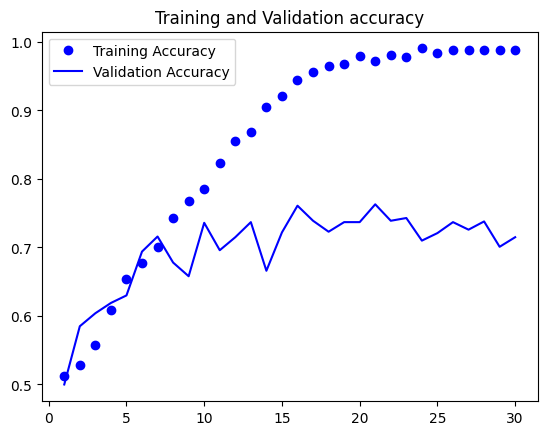

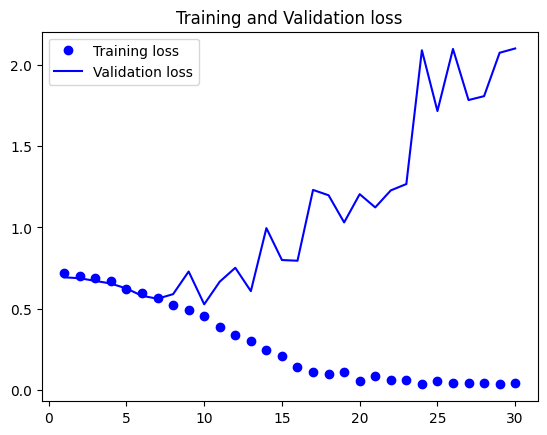

In [35]:
import matplotlib.pyplot as plt 
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,"bo",label="Training Accuracy")
plt.plot(epochs,val_accuracy,"b",label="Validation Accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [38]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss,test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy, {test_acc:.3f}, Test loss {test_loss}")

63/63 [==============================] - 52s 803ms/step - loss: 0.5588 - accuracy: 0.7145
Test accuracy, 0.715, Test loss 0.5587515234947205
